In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data= pd.read_csv("ai4i2020.csv")

In [3]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    data = data.drop_duplicates()

Number of duplicate rows: 0


In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
# 1. Mean imputation for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))
# 2. Forward fill for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna(method='ffill')

missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values in each column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Missing values after handling:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_62832\1412290463.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[non_numeric_cols] = data[non_numeric_cols].fillna(method='ffill')


C:\Users\ayush\AppData\Local\Temp\ipykernel_62832\1147843293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Machine failure', data=data, palette='viridis')


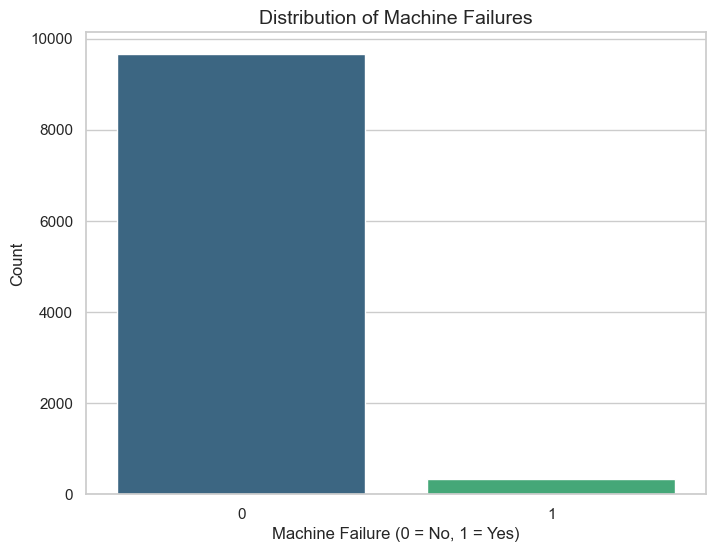

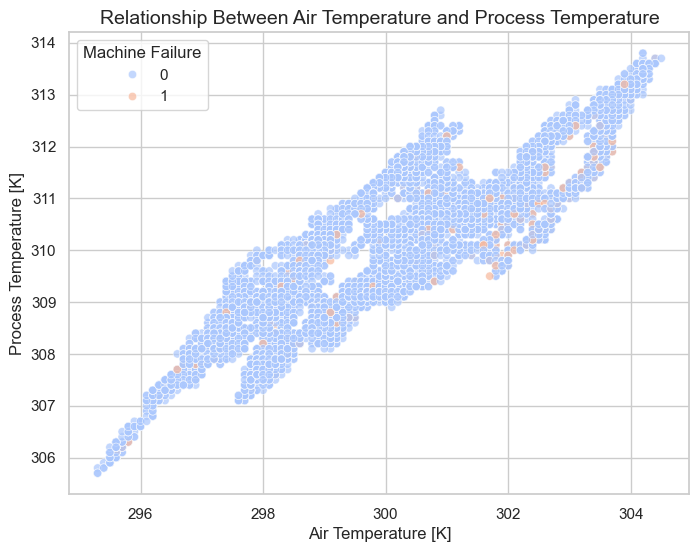

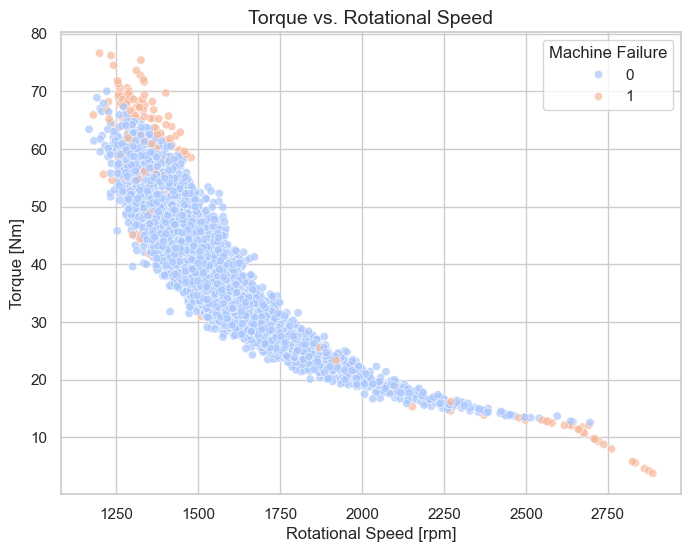

In [7]:
# Set a style for the plots
sns.set(style="whitegrid")

# 1. Bar plot for 'Machine Failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=data, palette='viridis')
plt.title('Distribution of Machine Failures', fontsize=14)
plt.xlabel('Machine Failure (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 2. Scatter plot for 'Air Temperature' vs 'Process Temperature'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=data, hue='Machine failure', palette='coolwarm', alpha=0.7)
plt.title('Relationship Between Air Temperature and Process Temperature', fontsize=14)
plt.xlabel('Air Temperature [K]', fontsize=12)
plt.ylabel('Process Temperature [K]', fontsize=12)
plt.legend(title='Machine Failure', loc='best')
plt.show()

# 3. Scatter plot for 'Torque' vs 'Rotational Speed'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=data, hue='Machine failure', palette='coolwarm', alpha=0.7)
plt.title('Torque vs. Rotational Speed', fontsize=14)
plt.xlabel('Rotational Speed [rpm]', fontsize=12)
plt.ylabel('Torque [Nm]', fontsize=12)
plt.legend(title='Machine Failure', loc='best')
plt.show()


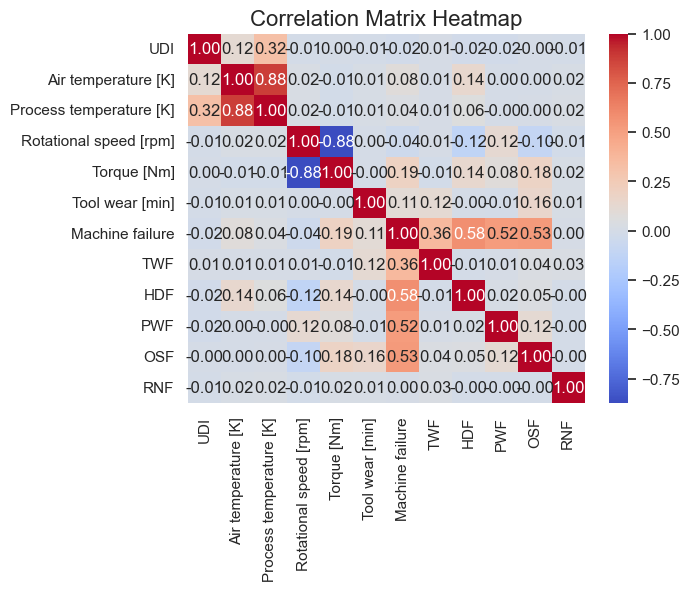

Summary Statistics for Numerical Columns:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               116

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()
numerical_summary = data.describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

In [9]:
# Initialize the label encoder
label_encoder = LabelEncoder()
# Perform label encoding on 'Type' and 'Product ID'
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Product ID'] = label_encoder.fit_transform(data['Product ID'])
data.to_csv('label_encoded_dataset.csv', index=False)
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
# Normalize the selected numerical features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,-1.731878,7003,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-1.731531,1003,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-1.731185,1004,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-1.730838,1005,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-1.730492,1006,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


In [11]:
# Ensure the target column is binary (integer type)
data['Machine failure'] = data['Machine failure'].astype(int)
# Separate features and target
X = data.drop(['UDI', 'Product ID', 'Machine failure'], axis=1)
y = data['Machine failure']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Set up GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
# Fit the model
grid_search.fit(X_train, y_train)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9991250624804683


In [16]:
print(y_test.unique())

[0 5]


In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label=5)
recall = recall_score(y_test, y_pred,pos_label=5)
f1 = f1_score(y_test, y_pred,pos_label=5)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.999
Precision: 1.0
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716
Confusion Matrix:
[[1932    0]
 [   2   66]]


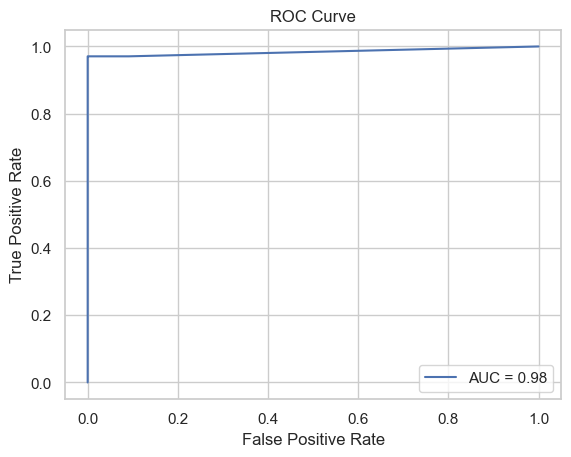

In [20]:
probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs,pos_label=5)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
feature_importances = best_model.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", important_features)

Feature Importance:
                     Feature  Importance
7                       HDF    0.272093
9                       OSF    0.232373
8                       PWF    0.200104
6                       TWF    0.108812
4               Torque [Nm]    0.076630
3    Rotational speed [rpm]    0.044600
5           Tool wear [min]    0.028837
1       Air temperature [K]    0.017290
2   Process temperature [K]    0.015728
0                      Type    0.003187
10                      RNF    0.000345
